# Handling Outliers

## 5 number Summary And Box Plot
Minimum, Maximum, Median, Q1, Q3, IQR

In [1]:
import numpy as np

In [2]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [3]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [4]:
IQR=Q3-Q1
print(IQR)

35.0


In [5]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)


In [6]:
lower_fence

np.float64(1.5)

In [7]:
higher_fence

np.float64(141.5)

In [8]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [9]:
import seaborn as sns

<Axes: >

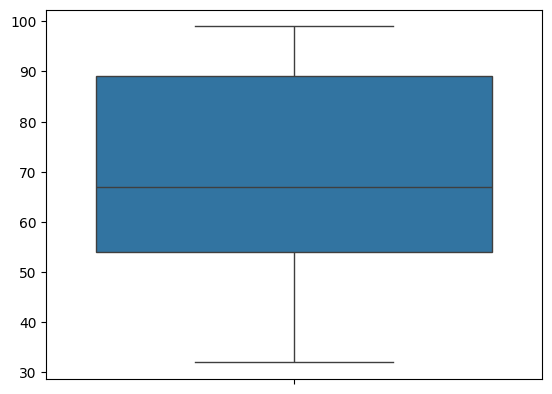

In [10]:
sns.boxplot(lst_marks)

In [11]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

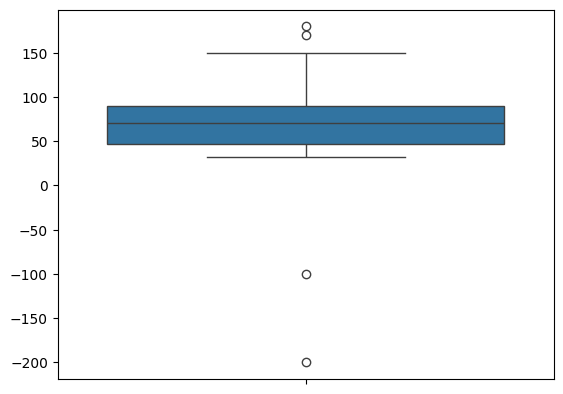

In [12]:
sns.boxplot(lst_marks)

In [13]:
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [14]:
minimum,Q1,median,Q3,maximum

(np.float64(-200.0),
 np.float64(47.25),
 np.float64(70.5),
 np.float64(89.75),
 np.float64(180.0))

In [15]:
IQR=Q3-Q1
print(IQR)
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
print(lower_fence)
print(higher_fence)

42.5
-16.5
153.5


In [16]:
new_lst_marks= [l for l in lst_marks if l>=lower_fence and l<=higher_fence]

<Axes: >

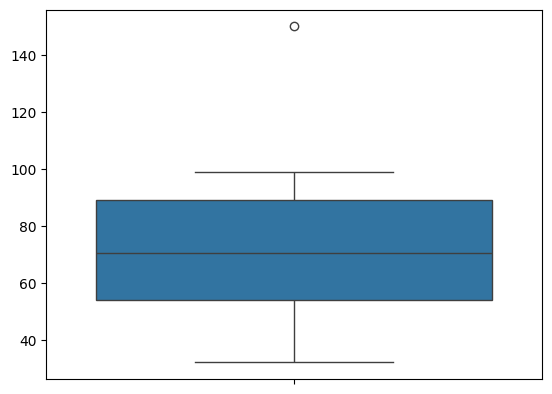

In [17]:
sns.boxplot(new_lst_marks)

If we check the boxplot, we see there is still an outlier this too can be removed

## Handling outliers in a dataset

Old Shape:  (442, 10)
New Shape:  (439, 10)


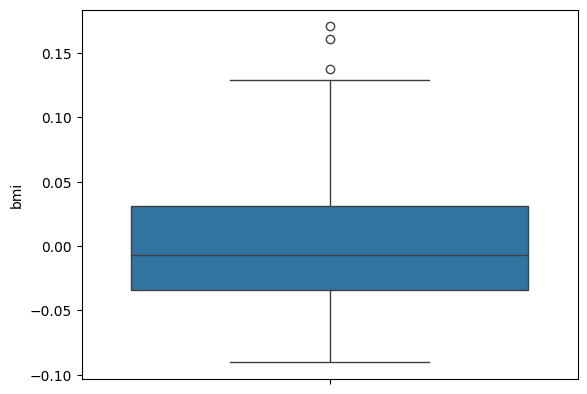

In [18]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

sns.boxplot(df_diabetes['bmi'])

Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

print("New Shape: ", df_diabetes.shape)

In [19]:
Q1 = np.percentile(df_diabetes['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetes['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978836


Multiple ways to find Q1, Q3, IQR and handle the outliers using numpy, pandas, manual calcualtions.